In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,  cross_val_score, StratifiedKFold
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib


from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler


from scipy.spatial.distance import euclidean
from tqdm.notebook import tqdm, trange
from sklearn.model_selection import KFold

matplotlib.rcParams['figure.figsize'] = 16, 12



from custom_log_regression import toy_log_reg_model
from get_data_prepare_3 import get_mod_data

Моё решение соревнования на Kaggle - "Choose tutors Choose proper tutors for math exam".
https://www.kaggle.com/c/choose-tutors/leaderboard#score

In [2]:
df_train = pd.read_csv('./data/train.csv')
df_test  = pd.read_csv('./data/test.csv')

In [3]:
df_train.head()

,Id,age,years_of_experience,lesson_price,qualification,physics,chemistry,biology,english,geography,history,mean_exam_points,choose
0,0,35.0,0.0,2150.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,74.0,0
1,1,52.0,2.0,1250.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,57.0,1
2,2,29.0,3.0,1750.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,66.0,0
3,3,33.0,3.0,1050.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,1
4,4,46.0,3.0,2250.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,73.0,0


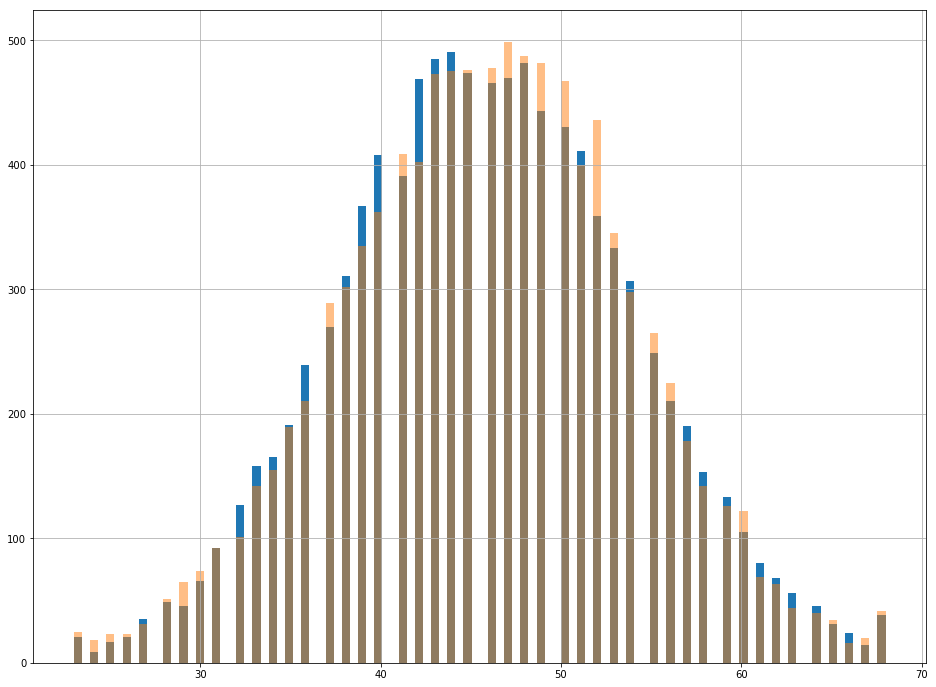

In [4]:
df_train['age'].hist(bins=100)
df_test['age'].hist(bins=100, alpha=0.5)

(<matplotlib.axes._subplots.AxesSubplot at 0x1fdbf30d630>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fdbf30d630>)

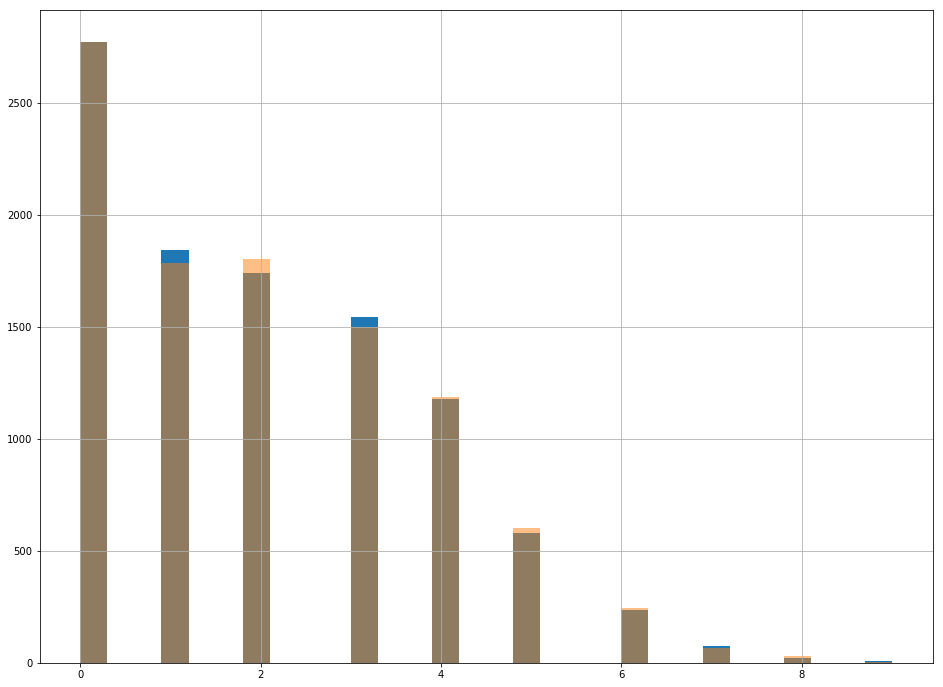

In [5]:
df_train['years_of_experience'].hist(bins=30),  df_test['years_of_experience'].hist(bins=30, alpha=0.5)

(<matplotlib.axes._subplots.AxesSubplot at 0x1fdbef989e8>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fdbef989e8>)

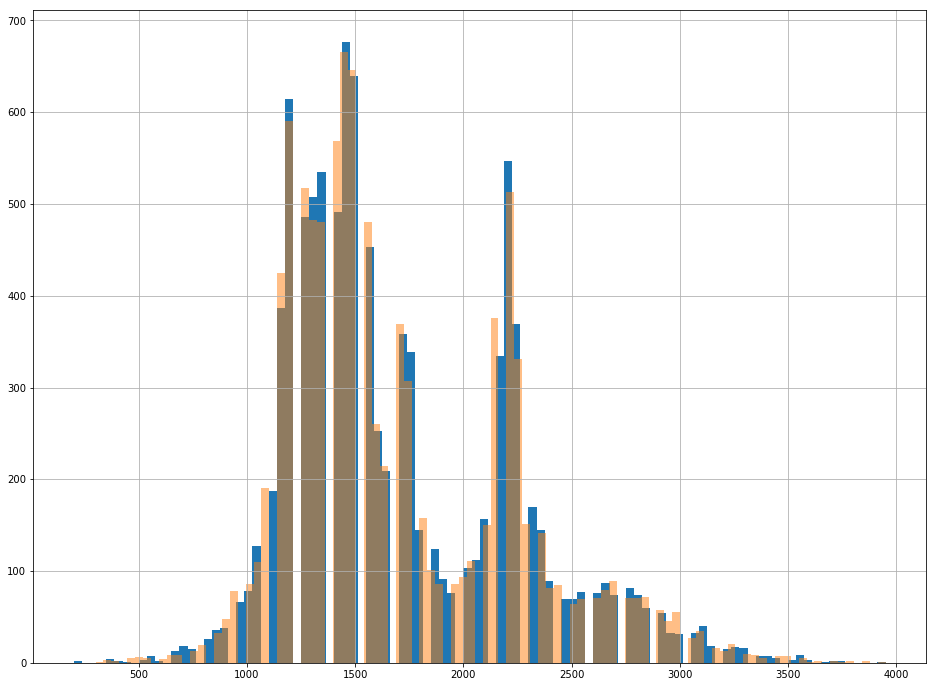

In [6]:
df_train['lesson_price'].hist(bins=100), df_test['lesson_price'].hist(bins=100, alpha=0.5)

(<matplotlib.axes._subplots.AxesSubplot at 0x1fdbf6eb8d0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fdbf6eb8d0>)

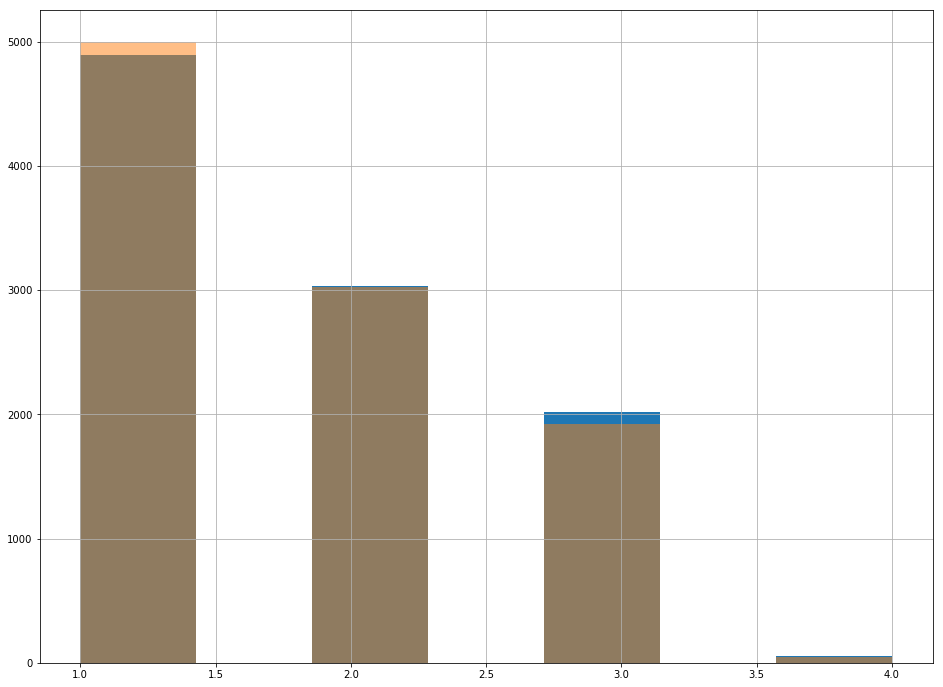

In [7]:
df_train['qualification'].hist(bins=7),  df_test['qualification'].hist(bins=7, alpha=0.5)

(<matplotlib.axes._subplots.AxesSubplot at 0x1fdbfbeb208>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fdbfbeb208>)

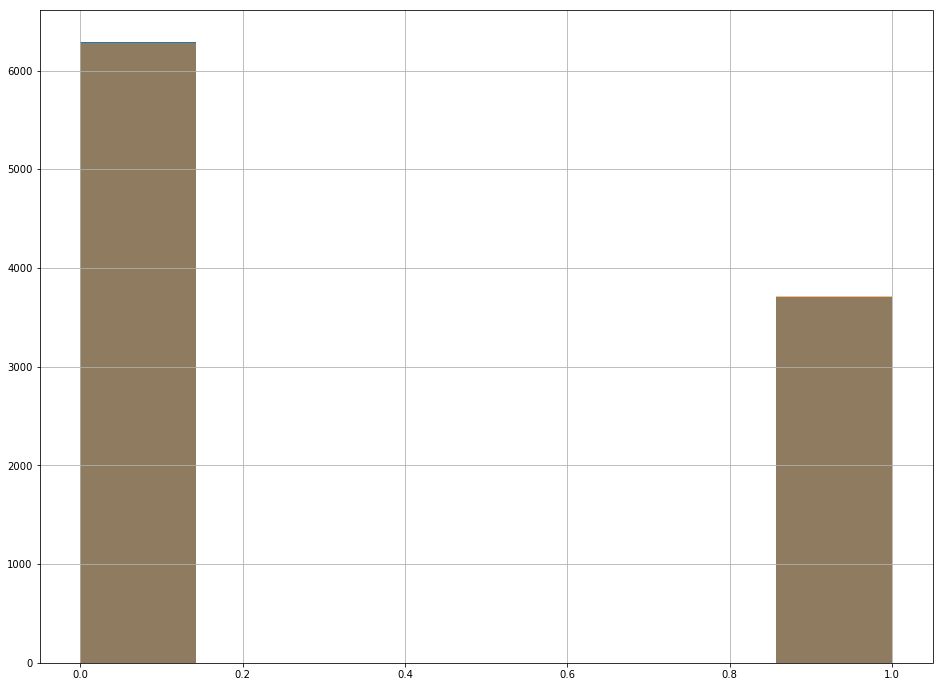

In [8]:
df_train['physics'].hist(bins=7),  df_test['physics'].hist(bins=7, alpha=0.5)

(<matplotlib.axes._subplots.AxesSubplot at 0x1fdbf7d6f28>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fdbf7d6f28>)

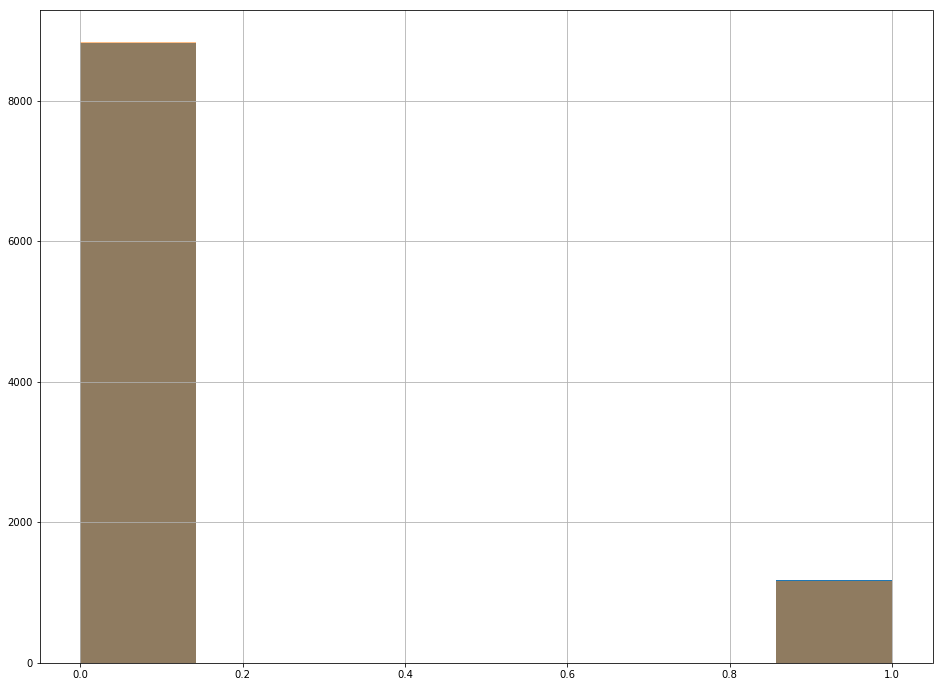

In [9]:
df_train['biology'].hist(bins=7),  df_test['biology'].hist(bins=7, alpha=0.5)

(<matplotlib.axes._subplots.AxesSubplot at 0x1fdbfadcc18>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fdbfadcc18>)

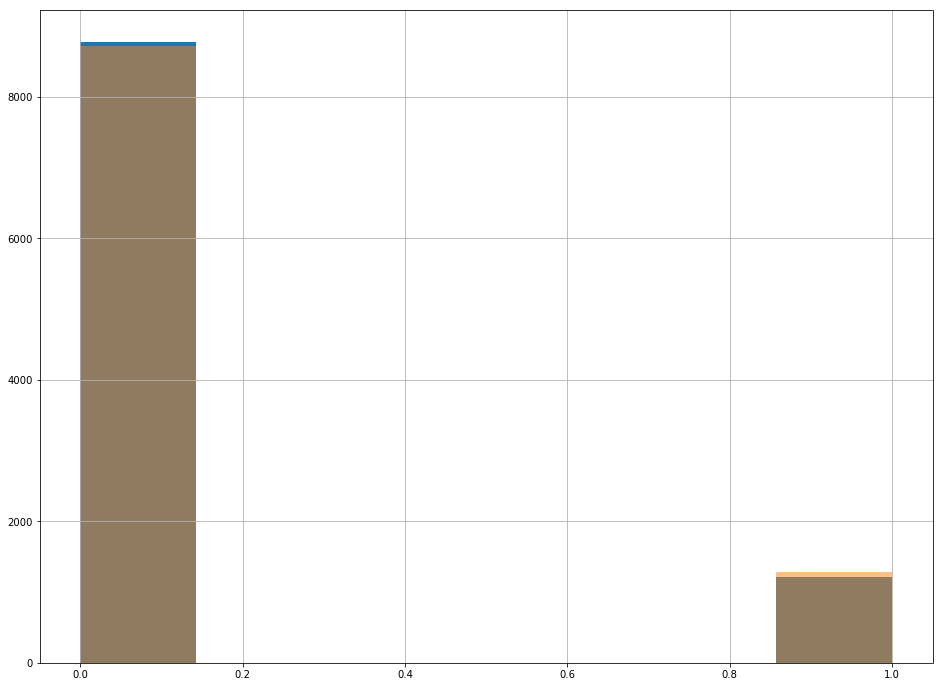

In [10]:
df_train['chemistry'].hist(bins=7),  df_test['chemistry'].hist(bins=7, alpha=0.5)

(<matplotlib.axes._subplots.AxesSubplot at 0x1fdbf7c39b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fdbf7c39b0>)

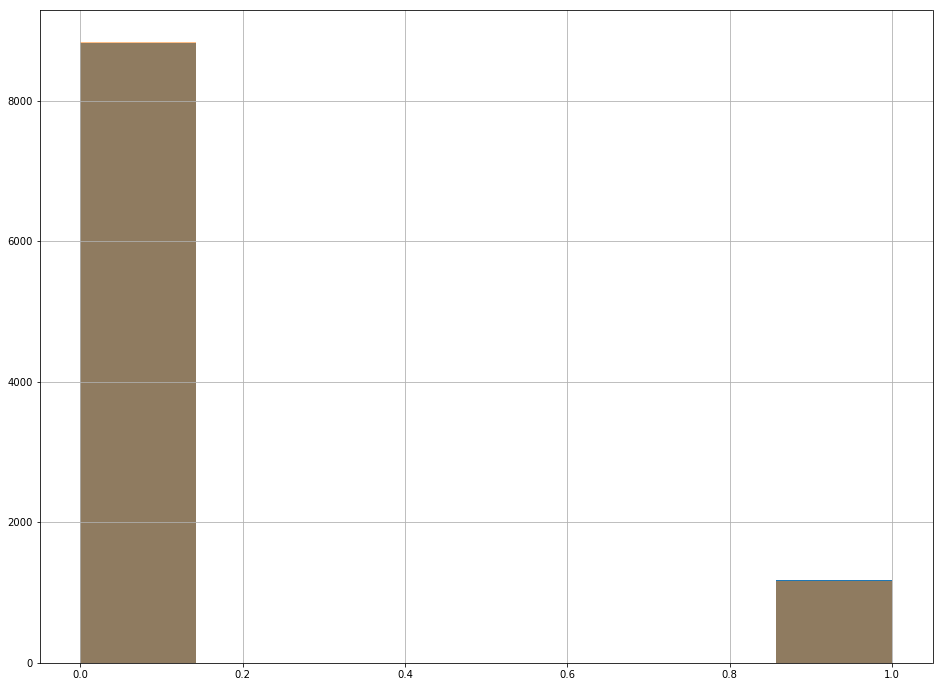

In [11]:
df_train['biology'].hist(bins=7),  df_test['biology'].hist(bins=7, alpha=0.5)

(<matplotlib.axes._subplots.AxesSubplot at 0x1fdc018db00>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fdc018db00>)

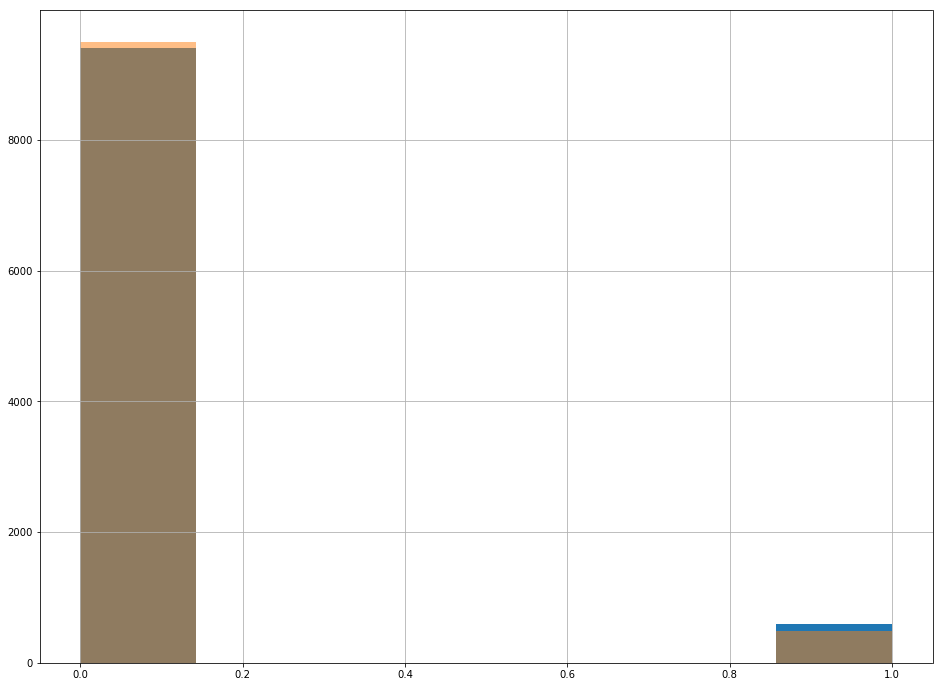

In [12]:
df_train['english'].hist(bins=7),  df_test['english'].hist(bins=7, alpha=0.5)

(<matplotlib.axes._subplots.AxesSubplot at 0x1fdc0489b70>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fdc0489b70>)

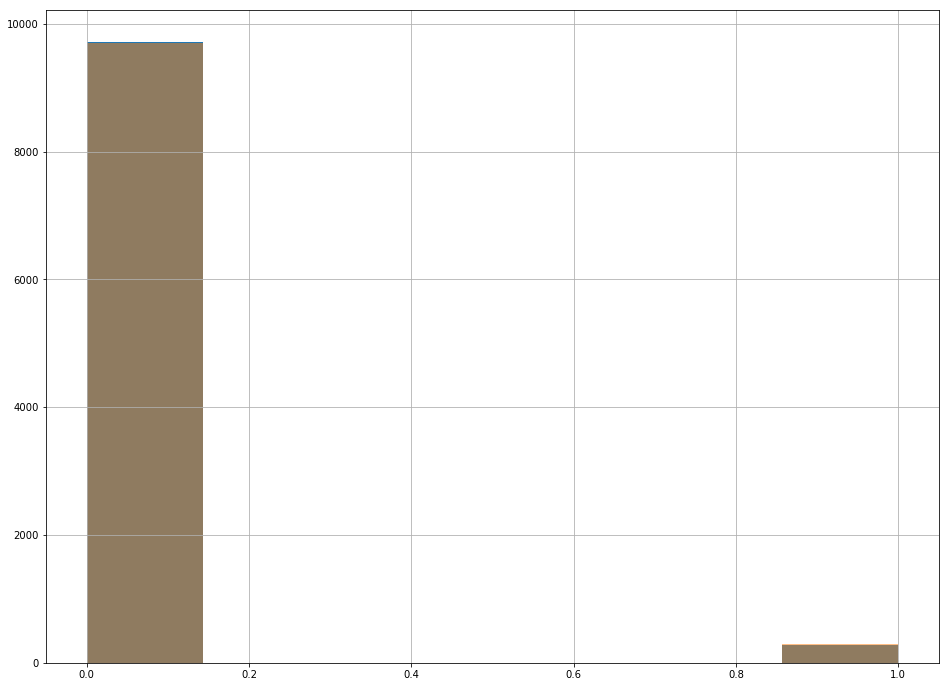

In [13]:
df_train['geography'].hist(bins=7),  df_test['geography'].hist(bins=7, alpha=0.5)

(<matplotlib.axes._subplots.AxesSubplot at 0x1fdc050f358>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1fdc050f358>)

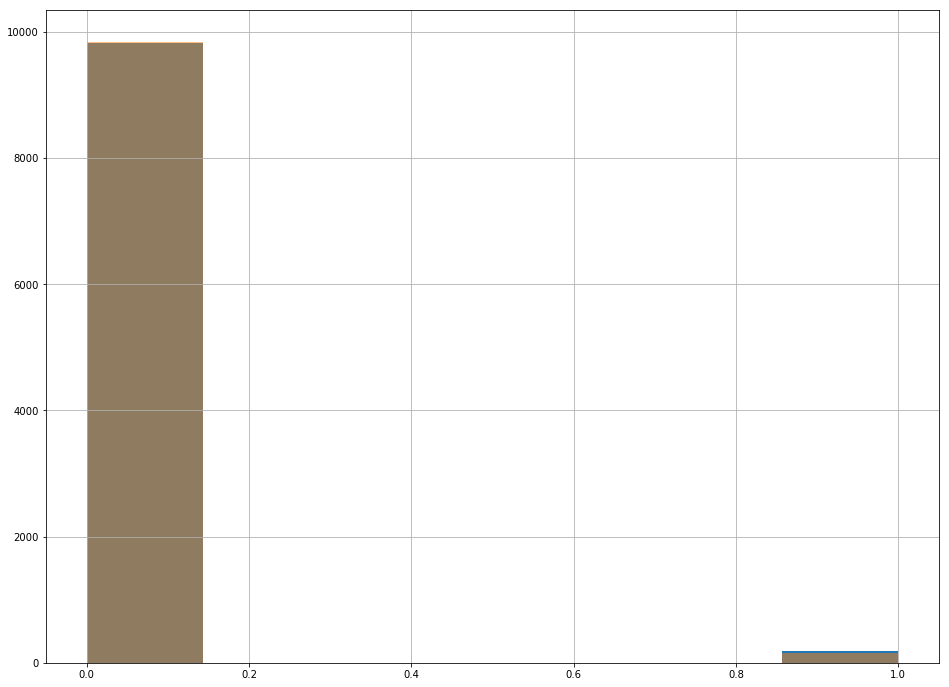

In [14]:
df_train['history'].hist(bins=7),  df_test['history'].hist(bins=7, alpha=0.5)

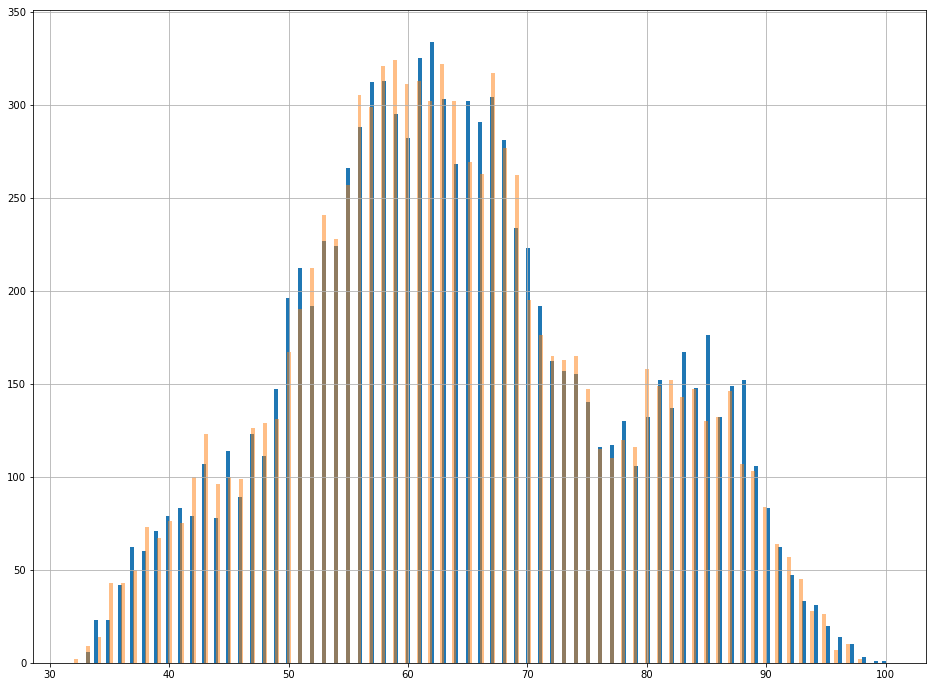

In [15]:
df_train['mean_exam_points'].hist(bins=200), df_test['mean_exam_points'].hist(bins=200, alpha=0.5)

df_train['mean_exam_points']=np.log(df_train['mean_exam_points'])
df_test['mean_exam_points']=np.log(df_test['mean_exam_points'])

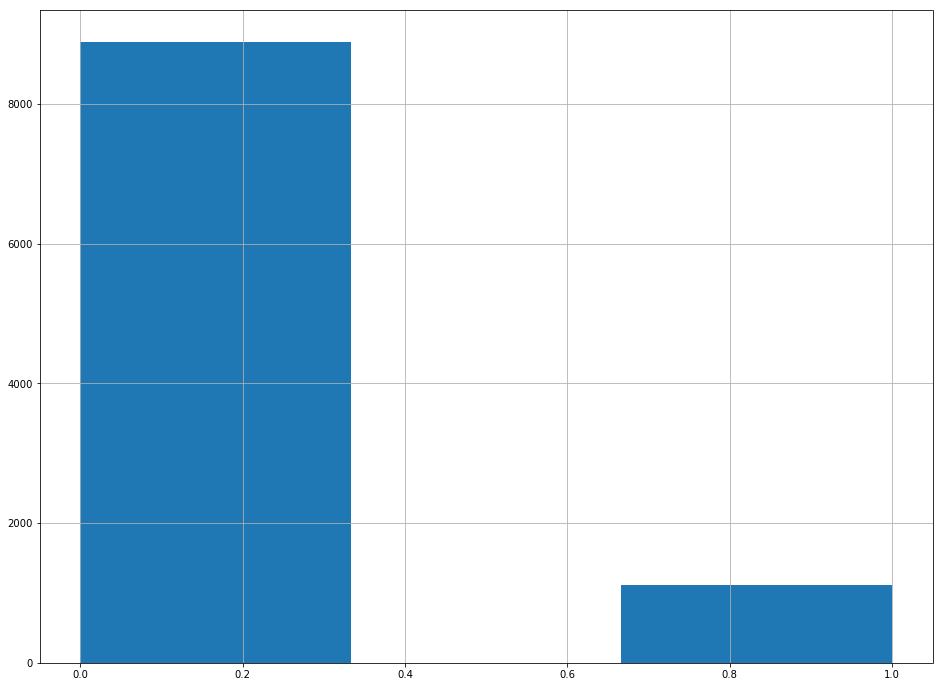

In [16]:
df_train['choose'].hist(bins=3)

In [17]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   10000 non-null  int64  
 1   age                  10000 non-null  float64
 2   years_of_experience  10000 non-null  float64
 3   lesson_price         10000 non-null  float64
 4   qualification        10000 non-null  float64
 5   physics              10000 non-null  float64
 6   chemistry            10000 non-null  float64
 7   biology              10000 non-null  float64
 8   english              10000 non-null  float64
 9   geography            10000 non-null  float64
 10  history              10000 non-null  float64
 11  mean_exam_points     10000 non-null  float64
 12  choose               10000 non-null  int64  
dtypes: float64(11), int64(2)
memory usage: 1015.8 KB


In [18]:
df_train['choose'].value_counts()

0    8891
1    1109
Name: choose, dtype: int64

In [19]:
df_train_y=df_train['choose']
df_train_idx = df_train['Id']
df_test_idx = df_test['Id']

C:\Users\rost_\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\rost_\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\rost_\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
 

lambda: 0.003 on step 3501

0.00032046033168718445 0.8535458344873931 0.0

(25, 1) (10000, 25)
train_roc_auc_score: 0.8535723047561595


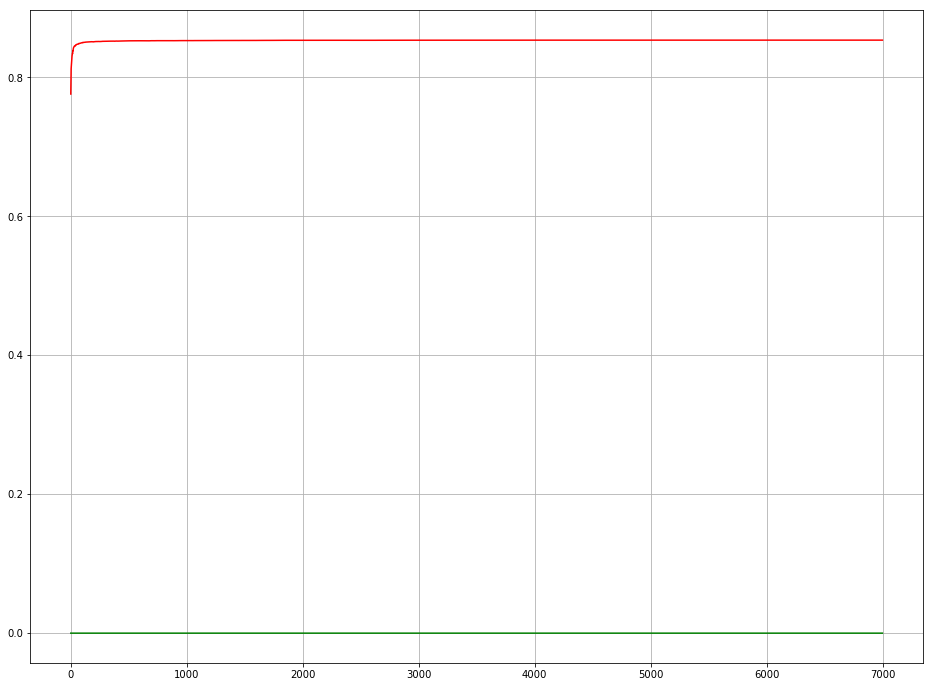

In [20]:
def write_final_pred(result):
    idx = [f for f in X_final if f in ['Id', 'age']]
    preds_final=X_final[idx]
    preds_final=preds_final.rename({'age': 'choose'}, axis=1) 
    preds_final['choose'] = result
    preds_final.to_csv('./preds/log_reg_results.csv', index=False)     
    return

test_res_list=[]

data=get_mod_data()
X_train_long, X_final, y_train_long, train_features_final = data.data_prepare(df_train, df_test)


logloss = toy_log_reg_model()
logloss.fit(X_train_long[train_features_final], y_train_long, batch_size = 1500)

result=logloss.predict(X_final[train_features_final])
#print('nans in predictions:  ',np.argwhere(np.isnan(result)))

write_final_pred(result)


### Результаты рабоьы бустирга оказались примерно на 0.5% хуже. Попытка обьеденить предсказания логистической регрессии и бустинга результатов не принесла.

Очень хотелось бы услышать ваше мнение - что было сделано не так как надо и чего я не сделал вообще?